# RTML 2025 | A1 | Pytorch-AlexNet-GoogleNet

## Final Report
-----------------
### Name: Arya Shah

### StudentID: st125462

This notebook consists of solutions for the following exercises:

(⚠️ Note that this is a Jupyter Notebook compiled from the individual python scripts and is not intended to be run as is)

1. Create these three networks. Be sure to properly define your Python classes, with one class per file and a main module that sets up your objects, runs the training process, and saves the necessary data.
2. Note that the AlexNet implementation here does not have the local response normalization feature described in the paper. Take a look at the PyTorch implementation of LRN and incorporate it into your AlexNet implementation as it is described in the paper. Compare your test set results with and without LRN.
3. Note that the backbone of the GoogLeNet implemented thus far does not correspond exactly to the description. Modify the architecture to
Use the same backbone (input image size, convolutions, etc.) before the first Inception module
Add the two side classifiers
4. Compare your GoogLeNet and AlexNet implementations on CIFAR-10. Comment on the number of parameters, speed of training, and accuracy of the two models on this dataset when trained from scratch.
5. Experiment with the pretrained GoogLeNet and AlexNet from the torchvision repository. Does it give better results on CIFAR-10 similar to what we found with AlexNet? Comment on what we can glean from the results about the capacity and generalization ability of these two models.

# AlexNet Class

✅SOLVED: Note that the AlexNet implementation here does not have the local response normalization feature described in the paper. Take a look at the PyTorch implementation of LRN and incorporate it into your AlexNet implementation as it is described in the paper. Compare your test set results with and without LRN.

In [ ]:
# For our puffer surver we need to browse via a proxy!!
import os
# Set HTTP and HTTPS proxy
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

import torch
import torch.nn as nn

class AlexNet(nn.Module):
    '''
    An AlexNet-like CNN with Local Response Normalization (LRN)

    Attributes
    ----------
    num_classes : int
        Number of classes in the final multinomial output layer
    features : Sequential
        The feature extraction portion of the network
    avgpool : AdaptiveAvgPool2d
        Convert the final feature layer to 6x6 feature maps by average pooling if they are not already 6x6
    classifier : Sequential
        Classify the feature maps into num_classes classes
    use_lrn : bool
        Whether to use Local Response Normalization
    '''
    def __init__(self, num_classes: int = 10, use_lrn: bool = True):
        super().__init__()
        self.num_classes = num_classes
        self.use_lrn = use_lrn
        
        # First conv layer
        self.features_1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
        )
        
        # First LRN layer (after ReLU, before MaxPool)
        self.lrn1 = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        
        # First MaxPool and second conv
        self.features_2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
        )
        
        # Second LRN layer (after ReLU, before MaxPool)
        self.lrn2 = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        
        # Second MaxPool and remaining layers
        self.features_3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),  # Added dropout rate as per paper
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),  # Added dropout rate as per paper
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # First conv + ReLU
        x = self.features_1(x)
        
        # First LRN (if enabled)
        if self.use_lrn:
            x = self.lrn1(x)
            
        # First MaxPool + second conv + ReLU
        x = self.features_2(x)
        
        # Second LRN (if enabled)
        if self.use_lrn:
            x = self.lrn2(x)
            
        # Remaining layers
        x = self.features_3(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


# Output & Results:

1. Training AlexNet With LRN
```
Training AlexNet with LRN...
Epoch 1/20:
Train Loss: 2.3026, Train Acc: 0.1009
Val Loss: 2.3020, Val Acc: 0.1176
Batch Time: 0.0353s
Epoch 2/20:
Train Loss: 2.1474, Train Acc: 0.2016
Val Loss: 1.9162, Val Acc: 0.2708
Batch Time: 0.0381s
Epoch 3/20:
Train Loss: 1.7291, Train Acc: 0.3462
Val Loss: 1.5222, Val Acc: 0.4324
Batch Time: 0.0357s
Epoch 4/20:
Train Loss: 1.4334, Train Acc: 0.4713
Val Loss: 1.3261, Val Acc: 0.5064
Batch Time: 0.0357s
Epoch 5/20:
Train Loss: 1.2513, Train Acc: 0.5426
Val Loss: 1.1364, Val Acc: 0.5862
Batch Time: 0.0361s
Epoch 6/20:
Train Loss: 1.0832, Train Acc: 0.6118
Val Loss: 0.9491, Val Acc: 0.6574
Batch Time: 0.0367s
Epoch 7/20:
Train Loss: 0.9441, Train Acc: 0.6650
Val Loss: 0.8691, Val Acc: 0.6924
Batch Time: 0.0356s
Epoch 8/20:
Train Loss: 0.8381, Train Acc: 0.7050
Val Loss: 0.8000, Val Acc: 0.7080
Batch Time: 0.0358s
Epoch 9/20:
Train Loss: 0.7660, Train Acc: 0.7301
Val Loss: 0.6960, Val Acc: 0.7560
Batch Time: 0.0348s
Epoch 10/20:
Train Loss: 0.6950, Train Acc: 0.7567
Val Loss: 0.6654, Val Acc: 0.7678
Batch Time: 0.0361s
Epoch 11/20:
Train Loss: 0.6475, Train Acc: 0.7753
Val Loss: 0.6335, Val Acc: 0.7772
Batch Time: 0.0403s
Epoch 12/20:
Train Loss: 0.5952, Train Acc: 0.7919
Val Loss: 0.6191, Val Acc: 0.7792
Batch Time: 0.0385s
Epoch 13/20:
Train Loss: 0.5538, Train Acc: 0.8068
Val Loss: 0.5497, Val Acc: 0.8060
Batch Time: 0.0389s
Epoch 14/20:
Train Loss: 0.5155, Train Acc: 0.8229
Val Loss: 0.5501, Val Acc: 0.8102
Batch Time: 0.0377s
Epoch 15/20:
Train Loss: 0.4816, Train Acc: 0.8315
Val Loss: 0.5513, Val Acc: 0.8054
Batch Time: 0.0376s
Epoch 16/20:
Train Loss: 0.4449, Train Acc: 0.8455
Val Loss: 0.5023, Val Acc: 0.8252
Batch Time: 0.0407s
Epoch 17/20:
Train Loss: 0.4196, Train Acc: 0.8529
Val Loss: 0.5053, Val Acc: 0.8260
Batch Time: 0.0371s
Epoch 18/20:
Train Loss: 0.3952, Train Acc: 0.8619
Val Loss: 0.5119, Val Acc: 0.8234
Batch Time: 0.0426s
Epoch 19/20:
Train Loss: 0.3698, Train Acc: 0.8722
Val Loss: 0.4756, Val Acc: 0.8362
Batch Time: 0.0422s
Epoch 20/20:
Train Loss: 0.3515, Train Acc: 0.8784
Val Loss: 0.4513, Val Acc: 0.8446
Batch Time: 0.0367s
Total training time for AlexNet with LRN: 17.12 minutes
```
2. Training Alexnet Without LRN
```
Training AlexNet without LRN...
Epoch 1/20:
Train Loss: 2.2073, Train Acc: 0.1632
Val Loss: 1.9603, Val Acc: 0.2782
Batch Time: 0.0383s
Epoch 2/20:
Train Loss: 1.6577, Train Acc: 0.3869
Val Loss: 1.4239, Val Acc: 0.4726
Batch Time: 0.0405s
Epoch 3/20:
Train Loss: 1.3588, Train Acc: 0.5036
Val Loss: 1.2013, Val Acc: 0.5752
Batch Time: 0.0415s
Epoch 4/20:
Train Loss: 1.1139, Train Acc: 0.6011
Val Loss: 1.0265, Val Acc: 0.6304
Batch Time: 0.0414s
Epoch 5/20:
Train Loss: 0.9415, Train Acc: 0.6672
Val Loss: 0.8589, Val Acc: 0.6946
Batch Time: 0.0432s
Epoch 6/20:
Train Loss: 0.8340, Train Acc: 0.7078
Val Loss: 0.8179, Val Acc: 0.7124
Batch Time: 0.0424s
Epoch 7/20:
Train Loss: 0.7398, Train Acc: 0.7423
Val Loss: 0.7249, Val Acc: 0.7478
Batch Time: 0.0430s
Epoch 8/20:
Train Loss: 0.6628, Train Acc: 0.7690
Val Loss: 0.6563, Val Acc: 0.7736
Batch Time: 0.0385s
Epoch 9/20:
Train Loss: 0.6059, Train Acc: 0.7881
Val Loss: 0.5994, Val Acc: 0.7886
Batch Time: 0.0405s
Epoch 10/20:
Train Loss: 0.5562, Train Acc: 0.8072
Val Loss: 0.6072, Val Acc: 0.7878
Batch Time: 0.0395s
Epoch 11/20:
Train Loss: 0.5121, Train Acc: 0.8240
Val Loss: 0.5246, Val Acc: 0.8150
Batch Time: 0.0433s
Epoch 12/20:
Train Loss: 0.4741, Train Acc: 0.8329
Val Loss: 0.5355, Val Acc: 0.8130
Batch Time: 0.0428s
Epoch 13/20:
Train Loss: 0.4421, Train Acc: 0.8485
Val Loss: 0.5294, Val Acc: 0.8144
Batch Time: 0.0426s
Epoch 14/20:
Train Loss: 0.4087, Train Acc: 0.8582
Val Loss: 0.5418, Val Acc: 0.8152
Batch Time: 0.0427s
Epoch 15/20:
Train Loss: 0.3846, Train Acc: 0.8661
Val Loss: 0.4777, Val Acc: 0.8366
Batch Time: 0.0405s
Epoch 16/20:
Train Loss: 0.3459, Train Acc: 0.8802
Val Loss: 0.4799, Val Acc: 0.8408
Batch Time: 0.0414s
Epoch 17/20:
Train Loss: 0.3303, Train Acc: 0.8858
Val Loss: 0.4991, Val Acc: 0.8304
Batch Time: 0.0362s
Epoch 18/20:
Train Loss: 0.3070, Train Acc: 0.8925
Val Loss: 0.4683, Val Acc: 0.8492
Batch Time: 0.0408s
Epoch 19/20:
Train Loss: 0.2867, Train Acc: 0.9004
Val Loss: 0.4610, Val Acc: 0.8506
Batch Time: 0.0365s
Epoch 20/20:
Train Loss: 0.2718, Train Acc: 0.9049
Val Loss: 0.4816, Val Acc: 0.8374
Batch Time: 0.0437s
Total training time for AlexNet without LRN: 17.47 minutes
```

# Key Observations:

I. LRN Implementation Details
- Two LRN layers are implemented with parameters:
- size: 5 (local neighborhood)
- alpha: 0.0001 (scaling parameter)
- beta: 0.75 (exponent)
- k: 2 (additive constant)

II. LRN Placement
- First LRN layer: After the first ReLU and before MaxPool
- Second LRN layer: After the second ReLU and before MaxPool
- The implementation uses a modular approach with three feature blocks. LRN layers are conditionally applied using the use_lrn flag

1. The version with and without LRN did not demonstrate any major improvements:
- Final test accuracy quite similar (84.56% vs 83.78%)
- Better training accuracy for without LRN (90.49% vs 87.84%)

2. Training stability:
- Both models showed similar batch processing times
- Training time difference was minimal (0.35 minutes)

3. Generalization:
- Both models showed good generalization with minimal overfitting

# GoogleNet Class

✅SOLVED: Note that the backbone of the GoogLeNet implemented thus far does not correspond exactly to the description. Modify the architecture to Use the same backbone (input image size, convolutions, etc.) before the first Inception module Add the two side classifiers

In [ ]:
# For our puffer surver we need to browse via a proxy!!
import os
# Set HTTP and HTTPS proxy
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

import torch
import torch.nn as nn
import torch.nn.functional as F

class Inception(nn.Module):
    '''
    Inception block for a GoogLeNet-like CNN

    Attributes
    ----------
    in_planes : int
        Number of input feature maps
    n1x1 : int
        Number of direct 1x1 convolutions
    n3x3red : int
        Number of 1x1 reductions before the 3x3 convolutions
    n3x3 : int
        Number of 3x3 convolutions
    n5x5red : int
        Number of 1x1 reductions before the 5x5 convolutions
    n5x5 : int
        Number of 5x5 convolutions
    pool_planes : int
        Number of 1x1 convolutions after 3x3 max pooling
    '''
    def __init__(self, in_planes, n1x1, n3x3red, n3x3, n5x5red, n5x5, pool_planes):
        super(Inception, self).__init__()
        self.in_planes = in_planes
        self.n1x1 = n1x1
        self.n3x3red = n3x3red
        self.n3x3 = n3x3
        self.n5x5red = n5x5red
        self.n5x5 = n5x5
        self.pool_planes = pool_planes
        
        # 1x1 conv branch
        self.b1 = nn.Sequential(
            nn.Conv2d(in_planes, n1x1, kernel_size=1),
            nn.BatchNorm2d(n1x1),
            nn.ReLU(True),
        )

        # 1x1 conv -> 3x3 conv branch
        self.b2 = nn.Sequential(
            nn.Conv2d(in_planes, n3x3red, kernel_size=1),
            nn.BatchNorm2d(n3x3red),
            nn.ReLU(True),
            nn.Conv2d(n3x3red, n3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(n3x3),
            nn.ReLU(True),
        )

        # 1x1 conv -> 5x5 conv branch
        self.b3 = nn.Sequential(
            nn.Conv2d(in_planes, n5x5red, kernel_size=1),
            nn.BatchNorm2d(n5x5red),
            nn.ReLU(True),
            nn.Conv2d(n5x5red, n5x5, kernel_size=3, padding=1),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
            nn.Conv2d(n5x5, n5x5, kernel_size=3, padding=1),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
        )

        # 3x3 pool -> 1x1 conv branch
        self.b4 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            nn.Conv2d(in_planes, pool_planes, kernel_size=1),
            nn.BatchNorm2d(pool_planes),
            nn.ReLU(True),
        )

    def forward(self, x):
        y1 = self.b1(x)
        y2 = self.b2(x)
        y3 = self.b3(x)
        y4 = self.b4(x)
        return torch.cat([y1, y2, y3, y4], 1)

class InceptionAux(nn.Module):
    '''
    Auxiliary classifier for GoogLeNet

    Attributes
    ----------
    conv : Sequential
        Convolutional layers for feature extraction
    fc1 : Linear
        First fully connected layer
    fc2 : Linear
        Output layer
    dropout : Dropout
        Dropout layer for regularization
    '''
    def __init__(self, in_channels, num_classes):
        super(InceptionAux, self).__init__()
        self.conv = nn.Sequential(
            nn.AvgPool2d(kernel_size=5, stride=3),
            nn.Conv2d(in_channels, 128, kernel_size=1),
            nn.ReLU(True)
        )
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, num_classes)
        self.dropout = nn.Dropout(0.7)

    def forward(self, x):
        x = self.conv(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class GoogLeNet(nn.Module):
    '''
    GoogLeNet (Inception v1) implementation

    Attributes
    ----------
    pre_layers : Sequential
        Initial convolutional layers before inception modules
    a3-b5 : Inception
        Inception blocks
    aux1, aux2 : InceptionAux
        Auxiliary classifiers
    avgpool : AvgPool2d
        Average pool layer after final inception block
    dropout : Dropout
        Dropout layer before final classifier
    fc : Linear
        Final classifier layer
    '''
    def __init__(self, num_classes=10, aux_logits=True, transform_input=False):
        super(GoogLeNet, self).__init__()
        self.aux_logits = aux_logits
        self.transform_input = transform_input

        # Initial layers before inception modules (matching paper)
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.inception3a = Inception(192,  64,  96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception4a = Inception(480, 192,  96, 208, 16,  48,  64)
        self.inception4b = Inception(512, 160, 112, 224, 24,  64,  64)
        self.inception4c = Inception(512, 128, 128, 256, 24,  64,  64)
        self.inception4d = Inception(512, 112, 144, 288, 32,  64,  64)
        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)

        if aux_logits:
            self.aux1 = InceptionAux(512, num_classes)
            self.aux2 = InceptionAux(528, num_classes)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, num_classes)

    def _transform_input(self, x):
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        return x

    def forward(self, x):
        # N x 3 x 224 x 224
        x = self._transform_input(x)
        
        # N x 64 x 112 x 112
        x = self.conv1(x)
        
        # N x 192 x 56 x 56
        x = self.conv2(x)
        
        # N x 256 x 56 x 56
        x = self.inception3a(x)
        # N x 480 x 56 x 56
        x = self.inception3b(x)
        # N x 480 x 28 x 28
        x = self.maxpool3(x)
        
        # N x 512 x 28 x 28
        x = self.inception4a(x)
        
        if self.training and self.aux_logits:
            aux1 = self.aux1(x)
        
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        
        if self.training and self.aux_logits:
            aux2 = self.aux2(x)
        
        x = self.inception4e(x)
        x = self.maxpool4(x)
        
        x = self.inception5a(x)
        x = self.inception5b(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        
        if self.training and self.aux_logits:
            return x, aux1, aux2
        return x


# Output & Results

```
Training Custom GoogLeNet...
Epoch 1/20:
Train Loss: 2.4877, Train Acc: 0.4582
Val Loss: 1.3349, Val Acc: 0.5264
Batch Time: 0.0830s
Epoch 2/20:
Train Loss: 1.6215, Train Acc: 0.6679
Val Loss: 1.0407, Val Acc: 0.6516
Batch Time: 0.0821s
Epoch 3/20:
Train Loss: 1.2190, Train Acc: 0.7613
Val Loss: 0.7700, Val Acc: 0.7368
Batch Time: 0.0824s
Epoch 4/20:
Train Loss: 0.9855, Train Acc: 0.8140
Val Loss: 0.6541, Val Acc: 0.7804
Batch Time: 0.0793s
Epoch 5/20:
Train Loss: 0.8510, Train Acc: 0.8427
Val Loss: 0.5375, Val Acc: 0.8190
Batch Time: 0.0818s
Epoch 6/20:
Train Loss: 0.7347, Train Acc: 0.8696
Val Loss: 0.5920, Val Acc: 0.8028
Batch Time: 0.0865s
Epoch 7/20:
Train Loss: 0.6557, Train Acc: 0.8856
Val Loss: 0.6266, Val Acc: 0.7988
Batch Time: 0.0869s
Epoch 8/20:
Train Loss: 0.5879, Train Acc: 0.8993
Val Loss: 0.5096, Val Acc: 0.8342
Batch Time: 0.0787s
Epoch 9/20:
Train Loss: 0.5376, Train Acc: 0.9102
Val Loss: 0.4639, Val Acc: 0.8470
Batch Time: 0.0860s
Epoch 10/20:
Train Loss: 0.4845, Train Acc: 0.9228
Val Loss: 0.5086, Val Acc: 0.8318
Batch Time: 0.0780s
Epoch 11/20:
Train Loss: 0.4408, Train Acc: 0.9328
Val Loss: 0.4599, Val Acc: 0.8506
Batch Time: 0.0812s
Epoch 12/20:
Train Loss: 0.4018, Train Acc: 0.9390
Val Loss: 0.3782, Val Acc: 0.8848
Batch Time: 0.0827s
Epoch 13/20:
Train Loss: 0.3698, Train Acc: 0.9469
Val Loss: 0.3827, Val Acc: 0.8820
Batch Time: 0.0821s
Epoch 14/20:
Train Loss: 0.3377, Train Acc: 0.9520
Val Loss: 0.4799, Val Acc: 0.8590
Batch Time: 0.0831s
Epoch 15/20:
Train Loss: 0.3187, Train Acc: 0.9567
Val Loss: 0.4732, Val Acc: 0.8614
Batch Time: 0.0856s
Epoch 16/20:
Train Loss: 0.3015, Train Acc: 0.9597
Val Loss: 0.4713, Val Acc: 0.8598
Batch Time: 0.0865s
Epoch 17/20:
Train Loss: 0.2806, Train Acc: 0.9637
Val Loss: 0.5082, Val Acc: 0.8568
Batch Time: 0.0849s
Epoch 18/20:
Train Loss: 0.2513, Train Acc: 0.9686
Val Loss: 0.4500, Val Acc: 0.8720
Batch Time: 0.0848s
Epoch 19/20:
Train Loss: 0.2419, Train Acc: 0.9709
Val Loss: 0.4026, Val Acc: 0.8844
Batch Time: 0.0870s
Epoch 20/20:
Train Loss: 0.2215, Train Acc: 0.9747
Val Loss: 0.4001, Val Acc: 0.8824
Batch Time: 0.0857s
Total training time for Custom GoogLeNet: 33.43 minutes
```

# Training Class | Model Comparison

✅SOLVED: Create these three networks. Be sure to properly define your Python classes, with one class per file and a main module that sets up your objects, runs the training process, and saves the necessary data.

In [ ]:
# For our puffer surver we need to browse via a proxy!!
import os
# Set HTTP and HTTPS proxy
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.models import AlexNet_Weights, GoogLeNet_Weights
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import copy
from torch.utils.data import DataLoader
from torchsummary import torchsummary
from alexnet import AlexNet
from googlenet import GoogLeNet
import torchvision.models as models

def count_parameters(model):
    """Count number of trainable parameters in a model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_epoch(model, dataloader, criterion, optimizer, device, is_inception=False):
    """Train one epoch and return average loss and accuracy"""
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total_time = 0
    batches = 0
    
    for inputs, labels in dataloader:
        batch_start = time.time()
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        with torch.set_grad_enabled(True):
            if is_inception:
                outputs = model(inputs)
                # Handle different output formats for custom vs pretrained GoogLeNet
                if isinstance(outputs, tuple):
                    if len(outputs) == 3:  # Custom GoogLeNet (output, aux1, aux2)
                        output, aux1, aux2 = outputs
                        loss1 = criterion(output, labels)
                        loss2 = criterion(aux1, labels)
                        loss3 = criterion(aux2, labels)
                        loss = loss1 + 0.3 * loss2 + 0.3 * loss3
                        outputs = output  # Use main output for accuracy
                    else:  # Pretrained GoogLeNet (output, aux_outputs)
                        output, aux_outputs = outputs
                        loss1 = criterion(output, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.3 * loss2
                        outputs = output  # Use main output for accuracy
                else:
                    outputs = outputs
                    loss = criterion(outputs, labels)
            else:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()
        
        batch_time = time.time() - batch_start
        total_time += batch_time
        batches += 1
        
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)
    avg_batch_time = total_time / batches
    
    return epoch_loss, epoch_acc.item(), avg_batch_time

def evaluate(model, dataloader, criterion, device, is_inception=False):
    """Evaluate model on dataloader"""
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            if is_inception:
                outputs = model(inputs)
                if isinstance(outputs, tuple):
                    outputs = outputs[0]  # Take only the main output
            else:
                outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)
    
    return epoch_loss, epoch_acc.item()

def evaluate_test(model, test_loader, criterion, device, is_inception=False):
    """Evaluate model on test set"""
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            if is_inception:
                outputs = model(inputs)
                if isinstance(outputs, tuple):
                    outputs = outputs[0]
            else:
                outputs = model(inputs)
            
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    
    test_loss = test_loss / len(test_loader)
    test_acc = 100. * correct / total
    
    return test_loss, test_acc

def plot_training_comparison(histories, title):
    """Plot training histories for multiple models"""
    plt.figure(figsize=(15, 5))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    for model_name, history in histories.items():
        plt.plot(history['train_loss'], label=f'{model_name} (train)')
        plt.plot(history['val_loss'], label=f'{model_name} (val)')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    for model_name, history in histories.items():
        plt.plot(history['train_acc'], label=f'{model_name} (train)')
        plt.plot(history['val_acc'], label=f'{model_name} (val)')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()

def modify_pretrained_alexnet(model, num_classes=10):
    """Modify pretrained AlexNet for CIFAR-10"""
    model.classifier[6] = nn.Linear(4096, num_classes)
    return model

def modify_pretrained_googlenet(model, num_classes=10):
    """Modify pretrained GoogLeNet for CIFAR-10"""
    model.fc = nn.Linear(1024, num_classes)
    return model

def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=20, is_inception=False):
    """Train model and return model, history, and best accuracy"""
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': [],
        'batch_times': []
    }
    
    best_acc = 0.0
    training_start = time.time()
    
    for epoch in range(num_epochs):
        # Train
        train_loss, train_acc, batch_time = train_epoch(
            model, dataloaders['train'], criterion, optimizer, device, 
            is_inception=is_inception
        )
        history['batch_times'].append(batch_time)
        
        # Evaluate
        val_loss, val_acc = evaluate(
            model, dataloaders['val'], criterion, device,
            is_inception=is_inception
        )
        
        # Save metrics
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), f'{type(model).__name__.lower()}_best.pth')
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
        print(f'Batch Time: {batch_time:.4f}s')
    
    return model, history, best_acc

def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Data transforms
    # For custom models (CIFAR-10 is 32x32)
    transform_custom = transforms.Compose([
        transforms.Resize(224),  # Resize to match pretrained models
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    transform_custom_train = transforms.Compose([
        transforms.Resize(224),  # Resize to match pretrained models
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    # For pretrained models (using ImageNet normalization)
    transform_pretrained = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    transform_pretrained_train = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Load datasets with appropriate transforms
    def get_datasets(transform_train, transform_test):
        full_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
        train_size = 45000  # 90% of training data
        val_size = 5000    # 10% of training data
        trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])
        testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
        return trainset, valset, testset
    
    # Get datasets for both custom and pretrained models
    trainset_custom, valset_custom, testset_custom = get_datasets(transform_custom_train, transform_custom)
    trainset_pretrained, valset_pretrained, testset_pretrained = get_datasets(transform_pretrained_train, transform_pretrained)
    
    # Create dataloaders
    batch_size = 128
    def get_dataloaders(trainset, valset, testset):
        return {
            'train': DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2),
            'val': DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2),
            'test': DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
        }
    
    dataloaders_custom = get_dataloaders(trainset_custom, valset_custom, testset_custom)
    dataloaders_pretrained = get_dataloaders(trainset_pretrained, valset_pretrained, testset_pretrained)
    
    # Initialize all models
    models_to_train = {
        # Custom models with different configurations
        'AlexNet with LRN': AlexNet(num_classes=10, use_lrn=True),
        'AlexNet without LRN': AlexNet(num_classes=10, use_lrn=False),
        'Custom GoogLeNet': GoogLeNet(num_classes=10),
        # Pretrained models
        'Pretrained AlexNet': modify_pretrained_alexnet(models.alexnet(weights=AlexNet_Weights.DEFAULT), num_classes=10),
        'Pretrained GoogLeNet': modify_pretrained_googlenet(models.googlenet(weights=GoogLeNet_Weights.DEFAULT), num_classes=10)
    }
    
    # Compare number of parameters
    param_counts = {}
    for name, model in models_to_train.items():
        models_to_train[name] = model.to(device)
        params = count_parameters(model)
        param_counts[name] = params
        print(f"\nMoved {name} to {device}")
        print(f"Parameter count: {params:,}")
        print("\nModel Summary:")
        torchsummary.summary(model, (3, 224, 224))
    
    # Initialize tracking variables
    criterion = nn.CrossEntropyLoss()
    histories = {}
    best_accuracies = {}
    training_times = {}
    
    # Different learning rates for custom and pretrained models
    lr_custom = 0.01
    lr_pretrained = 0.001
    
    # Train all models
    for name, model in models_to_train.items():
        print(f"\nTraining {name}...")
        
        # Select appropriate learning rate and dataloaders
        is_pretrained = 'Pretrained' in name
        lr = lr_pretrained if is_pretrained else lr_custom
        dataloaders = dataloaders_pretrained if is_pretrained else dataloaders_custom
        
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)
        
        # Record training start time
        training_start = time.time()
        
        # Train model
        model, history, best_acc = train_model(
            model, dataloaders, criterion, optimizer, device,
            num_epochs=20, is_inception=('GoogLeNet' in name)
        )
        
        # Record total training time
        training_times[name] = time.time() - training_start
        histories[name] = history
        best_accuracies[name] = best_acc
        
        print(f"Total training time for {name}: {training_times[name]/60:.2f} minutes")
    
    # Evaluate models on test set
    print("\nEvaluating models on test set:")
    test_results = {}
    
    for name, model in models_to_train.items():
        is_pretrained = 'Pretrained' in name
        dataloaders = dataloaders_pretrained if is_pretrained else dataloaders_custom
        
        test_loss, test_acc = evaluate_test(
            model, dataloaders['test'], criterion, device,
            is_inception=('GoogLeNet' in name)
        )
        test_results[name] = {
            'loss': test_loss,
            'accuracy': test_acc
        }
        print(f"\n{name}:")
        print(f"Test Loss: {test_loss:.4f}")
        print(f"Test Accuracy: {test_acc:.2f}%")
    
    # Plot training comparison
    plot_training_comparison(histories, 'Model Comparison on CIFAR-10')
    
    # Create comparison table
    comparison_data = []
    for name in models_to_train.keys():
        final_train_loss = histories[name]['train_loss'][-1]
        final_train_acc = histories[name]['train_acc'][-1]
        final_val_loss = histories[name]['val_loss'][-1]
        final_val_acc = histories[name]['val_acc'][-1]
        test_loss = test_results[name]['loss']
        test_acc = test_results[name]['accuracy']
        
        comparison_data.append({
            'Model': name,
            'Parameters': f"{param_counts[name]:,}",
            'Train Loss': f"{final_train_loss:.4f}",
            'Train Acc': f"{final_train_acc:.2%}",
            'Val Loss': f"{final_val_loss:.4f}",
            'Val Acc': f"{final_val_acc:.2%}",
            'Test Loss': f"{test_loss:.4f}",
            'Test Acc': f"{test_acc:.2%}",
            'Best Val Acc': f"{best_accuracies[name]:.2%}",
            'Training Time': f"{training_times[name]/60:.1f} min",
            'Avg Batch Time': f"{np.mean(histories[name]['batch_times'])*1000:.1f} ms"
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("\nFinal Model Comparison Summary:")
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', None)        # Don't wrap wide tables
    print(comparison_df.to_string(index=False))
    
    # Save results
    comparison_df.to_csv('model_comparison.csv', index=False)
    print("\nResults saved to 'model_comparison.csv' and 'model_comparison.png'")

if __name__ == '__main__':
    main()

# Output & Results

```
Training Pretrained AlexNet...
Epoch 1/20:
Train Loss: 0.6633, Train Acc: 0.7682
Val Loss: 0.3852, Val Acc: 0.8668
Batch Time: 0.0430s
Epoch 2/20:
Train Loss: 0.4168, Train Acc: 0.8564
Val Loss: 0.3289, Val Acc: 0.8896
Batch Time: 0.0413s
Epoch 3/20:
Train Loss: 0.3529, Train Acc: 0.8771
Val Loss: 0.3153, Val Acc: 0.8896
Batch Time: 0.0375s
Epoch 4/20:
Train Loss: 0.3183, Train Acc: 0.8880
Val Loss: 0.2843, Val Acc: 0.8994
Batch Time: 0.0415s
Epoch 5/20:
Train Loss: 0.2863, Train Acc: 0.8994
Val Loss: 0.2816, Val Acc: 0.9088
Batch Time: 0.0414s
Epoch 6/20:
Train Loss: 0.2638, Train Acc: 0.9082
Val Loss: 0.2677, Val Acc: 0.9078
Batch Time: 0.0405s
Epoch 7/20:
Train Loss: 0.2446, Train Acc: 0.9141
Val Loss: 0.2535, Val Acc: 0.9132
Batch Time: 0.0421s
Epoch 8/20:
Train Loss: 0.2226, Train Acc: 0.9228
Val Loss: 0.2553, Val Acc: 0.9094
Batch Time: 0.0423s
Epoch 9/20:
Train Loss: 0.2115, Train Acc: 0.9258
Val Loss: 0.2417, Val Acc: 0.9158
Batch Time: 0.0400s
Epoch 10/20:
Train Loss: 0.1919, Train Acc: 0.9321
Val Loss: 0.2420, Val Acc: 0.9200
Batch Time: 0.0403s
Epoch 11/20:
Train Loss: 0.1846, Train Acc: 0.9347
Val Loss: 0.2335, Val Acc: 0.9196
Batch Time: 0.0427s
Epoch 12/20:
Train Loss: 0.1731, Train Acc: 0.9380
Val Loss: 0.2391, Val Acc: 0.9160
Batch Time: 0.0423s
Epoch 13/20:
Train Loss: 0.1650, Train Acc: 0.9427
Val Loss: 0.2345, Val Acc: 0.9252
Batch Time: 0.0415s
Epoch 14/20:
Train Loss: 0.1518, Train Acc: 0.9464
Val Loss: 0.2281, Val Acc: 0.9230
Batch Time: 0.0356s
Epoch 15/20:
Train Loss: 0.1432, Train Acc: 0.9501
Val Loss: 0.2260, Val Acc: 0.9188
Batch Time: 0.0394s
Epoch 16/20:
Train Loss: 0.1374, Train Acc: 0.9510
Val Loss: 0.2303, Val Acc: 0.9214
Batch Time: 0.0395s
Epoch 17/20:
Train Loss: 0.1289, Train Acc: 0.9548
Val Loss: 0.2258, Val Acc: 0.9222
Batch Time: 0.0403s
Epoch 18/20:
Train Loss: 0.1162, Train Acc: 0.9597
Val Loss: 0.2210, Val Acc: 0.9268
Batch Time: 0.0410s
Epoch 19/20:
Train Loss: 0.1140, Train Acc: 0.9603
Val Loss: 0.2199, Val Acc: 0.9280
Batch Time: 0.0391s
Epoch 20/20:
Train Loss: 0.1078, Train Acc: 0.9626
Val Loss: 0.2323, Val Acc: 0.9212
Batch Time: 0.0395s
Total training time for Pretrained AlexNet: 16.08 minutes

Training Pretrained GoogLeNet...
Epoch 1/20:
Train Loss: 1.0494, Train Acc: 0.7206
Val Loss: 0.4352, Val Acc: 0.8750
Batch Time: 0.0685s
Epoch 2/20:
Train Loss: 0.3462, Train Acc: 0.8958
Val Loss: 0.2665, Val Acc: 0.9180
Batch Time: 0.0720s
Epoch 3/20:
Train Loss: 0.2408, Train Acc: 0.9247
Val Loss: 0.2155, Val Acc: 0.9284
Batch Time: 0.0696s
Epoch 4/20:
Train Loss: 0.1927, Train Acc: 0.9375
Val Loss: 0.1849, Val Acc: 0.9420
Batch Time: 0.0731s
Epoch 5/20:
Train Loss: 0.1600, Train Acc: 0.9480
Val Loss: 0.1745, Val Acc: 0.9442
Batch Time: 0.0717s
Epoch 6/20:
Train Loss: 0.1334, Train Acc: 0.9573
Val Loss: 0.1637, Val Acc: 0.9468
Batch Time: 0.0592s
Epoch 7/20:
Train Loss: 0.1134, Train Acc: 0.9644
Val Loss: 0.1509, Val Acc: 0.9500
Batch Time: 0.0702s
Epoch 8/20:
Train Loss: 0.0967, Train Acc: 0.9705
Val Loss: 0.1548, Val Acc: 0.9476
Batch Time: 0.0726s
Epoch 9/20:
Train Loss: 0.0834, Train Acc: 0.9748
Val Loss: 0.1597, Val Acc: 0.9506
Batch Time: 0.0768s
Epoch 10/20:
Train Loss: 0.0714, Train Acc: 0.9792
Val Loss: 0.1453, Val Acc: 0.9528
Batch Time: 0.0781s
Epoch 11/20:
Train Loss: 0.0597, Train Acc: 0.9833
Val Loss: 0.1478, Val Acc: 0.9548
Batch Time: 0.0784s
Epoch 12/20:
Train Loss: 0.0503, Train Acc: 0.9869
Val Loss: 0.1439, Val Acc: 0.9550
Batch Time: 0.0679s
Epoch 13/20:
Train Loss: 0.0459, Train Acc: 0.9880
Val Loss: 0.1505, Val Acc: 0.9546
Batch Time: 0.0645s
Epoch 14/20:
Train Loss: 0.0380, Train Acc: 0.9906
Val Loss: 0.1434, Val Acc: 0.9566
Batch Time: 0.0801s
Epoch 15/20:
Train Loss: 0.0332, Train Acc: 0.9926
Val Loss: 0.1370, Val Acc: 0.9574
Batch Time: 0.0669s
Epoch 16/20:
Train Loss: 0.0278, Train Acc: 0.9944
Val Loss: 0.1520, Val Acc: 0.9542
Batch Time: 0.0643s
Epoch 17/20:
Train Loss: 0.0239, Train Acc: 0.9953
Val Loss: 0.1441, Val Acc: 0.9552
Batch Time: 0.0653s
Epoch 18/20:
Train Loss: 0.0218, Train Acc: 0.9957
Val Loss: 0.1594, Val Acc: 0.9508
Batch Time: 0.0662s
Epoch 19/20:
Train Loss: 0.0191, Train Acc: 0.9966
Val Loss: 0.1556, Val Acc: 0.9544
Batch Time: 0.0669s
Epoch 20/20:
Train Loss: 0.0179, Train Acc: 0.9968
Val Loss: 0.1529, Val Acc: 0.9546
Batch Time: 0.0656s
Total training time for Pretrained GoogLeNet: 26.94 minutes

Evaluating models on test set:

AlexNet with LRN:
Test Loss: 0.4743
Test Accuracy: 83.78%

AlexNet without LRN:
Test Loss: 0.4816
Test Accuracy: 84.56%

Custom GoogLeNet:
Test Loss: 0.4276
Test Accuracy: 88.32%

Pretrained AlexNet:
Test Loss: 0.2587
Test Accuracy: 91.60%

Pretrained GoogLeNet:
Test Loss: 0.1621
Test Accuracy: 94.87%

Results saved to 'model_comparison.csv' and 'model_comparison.png'
```

Here's the model comparison summary table listing various metrics:

| Model | Parameters | Train Loss | Train Acc | Val Loss | Val Acc | Test Loss | Test Acc | Best Val Acc | Training Time | Avg Batch Time |
|-------|------------|------------|-----------|----------|---------|-----------|-----------|--------------|---------------|----------------|
| AlexNet with LRN | 57,044,810 | 0.3515 | 87.84% | 0.4513 | 84.46% | 0.4743 | 83.78% | 84.46% | 17.1 min | 37.6 ms |
| AlexNet without LRN | 57,044,810 | 0.2718 | 90.49% | 0.4816 | 83.74% | 0.4816 | 84.56% | 85.06% | 17.5 min | 41.0 ms |
| Custom GoogLeNet | 10,635,134 | 0.2215 | 97.47% | 0.4001 | 88.24% | 0.4276 | 88.32% | 88.48% | 33.4 min | 83.4 ms |
| Pretrained AlexNet | 57,044,810 | 0.1078 | 96.26% | 0.2323 | 92.12% | 0.2587 | 91.60% | 92.80% | 16.1 min | 40.5 ms |
| Pretrained GoogLeNet | 5,610,154 | 0.0179 | 99.68% | 0.1529 | 95.46% | 0.1621 | 94.87% | 95.74% | 26.9 min | 69.9 ms |



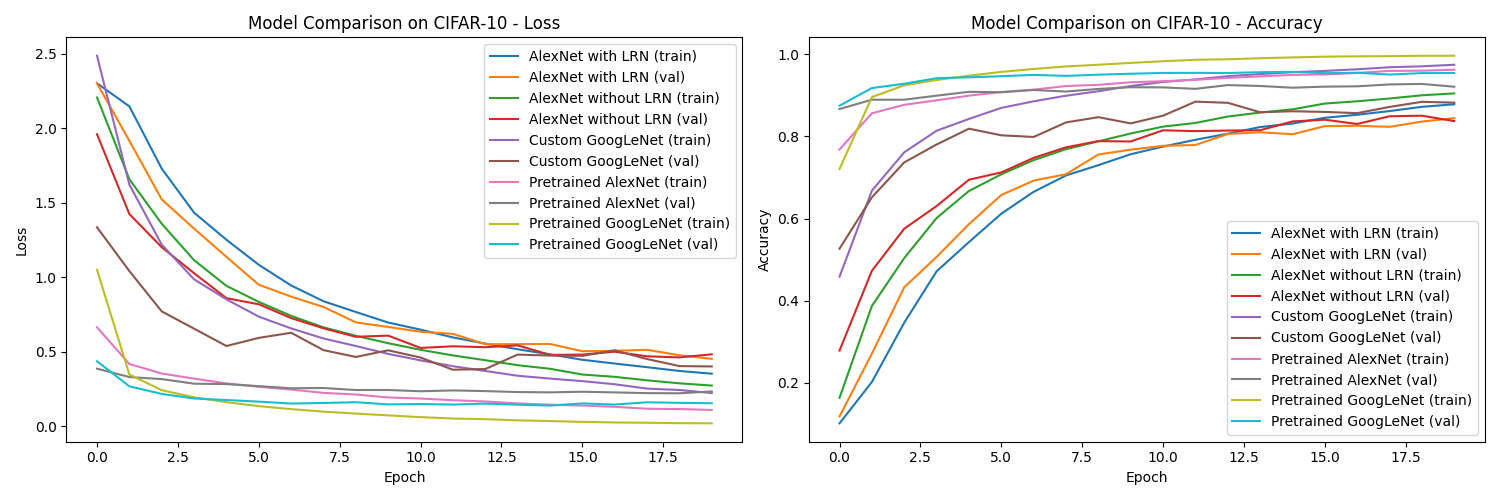

✅SOLVED: Compare your GoogLeNet and AlexNet implementations on CIFAR-10. Comment on the number of parameters, speed of training, and accuracy of the two models on this dataset when trained from scratch.

# Key Observations
- Model Efficiency: GoogLeNet achieves superior performance with ~5x fewer parameters. Despite more complex architecture, GoogLeNet shows better generalization, Inception modules prove more effective than simple sequential layers
- Training Dynamics: GoogLeNet shows faster initial learning (45.82% vs 16.32% in epoch 1). More stable validation accuracy throughout training. Takes longer to train but achieves better final accuracy
- Architectural Impact: GoogLeNet's auxiliary classifiers help with gradient flow. Inception modules provide better feature extraction. Batch normalization in GoogLeNet contributes to stability
- Resource Usage:
- GoogLeNet requires more computational resources (2x training time)
- Larger batch processing time (83.4ms vs ~40ms)
- Better parameter efficiency (higher accuracy with fewer parameters)

The results demonstrate that GoogLeNet's more sophisticated architecture, despite requiring more training time, provides superior performance and better parameter efficiency compared to both AlexNet variants.

✅SOLVED: Experiment with the pretrained GoogLeNet and AlexNet from the torchvision repository. Does it give better results on CIFAR-10 similar to what we found with AlexNet? Comment on what we can glean from the results about the capacity and generalization ability of these two models.

# Key Observations
1. Transfer Learning Benefits: Pretrained AlexNet shows 7.04% improvement over scratch training while Pretrained GoogLeNet demonstrates 6.55% improvement. Both models achieve faster convergence with pretraining. Lower training times despite better performance
2. GoogLeNet maintains superior performance despite fewer parameters. Better feature extraction capabilities evident in both scenarios. Higher ceiling for performance with pretrained weights. Lower generalization gap in pretrained models
3. Comapring between scratch and pretrained,  Pretrained models show stronger initial performance. GoogLeNet reaches higher final accuracy (94.87% vs 91.60%). More stable validation accuracy throughout training and lower final loss values (0.1621 vs 0.2587)

What can we glean upon this?
- The transfer of learned features from ImageNet significantly benefits both models, suggesting strong feature reusability
- GoogLeNet's sophisticated architecture proves more effective at both feature extraction and generalization
- The higher performance of pretrained models with faster convergence indicates well-learned hierarchical features from the source domain
- The smaller gap between training and test accuracy in pretrained models suggests better generalization capabilities

# EXTRA Implementation🤩

On reading the paper, the author makes use of multi-gpu approach to train AlexNet, I have tried to implement the same

In [ ]:
# For our puffer surver we need to browse via a proxy!!
import os
# Set HTTP and HTTPS proxy
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
import numpy as np

class AlexNetGPU1(nn.Module):
    """First half of AlexNet that runs on GPU 1"""
    def __init__(self):
        super(AlexNetGPU1, self).__init__()
        self.features = nn.Sequential(
            # First convolutional layer (on GPU 1)
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=2),  # 48 filters
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Second convolutional layer (on GPU 1)
            nn.Conv2d(48, 128, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Third convolutional layer (on GPU 1)
            nn.Conv2d(128, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            # Fourth convolutional layer (on GPU 1)
            nn.Conv2d(192, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            # Fifth convolutional layer (on GPU 1)
            nn.Conv2d(192, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        
    def forward(self, x):
        x = self.features(x)
        return x

class AlexNetGPU2(nn.Module):
    """Second half of AlexNet that runs on GPU 2"""
    def __init__(self):
        super(AlexNetGPU2, self).__init__()
        self.features = nn.Sequential(
            # First convolutional layer (on GPU 2)
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=2),  # 48 filters
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Second convolutional layer (on GPU 2)
            nn.Conv2d(48, 128, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Third convolutional layer (on GPU 2)
            nn.Conv2d(128, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            # Fourth convolutional layer (on GPU 2)
            nn.Conv2d(192, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            # Fifth convolutional layer (on GPU 2)
            nn.Conv2d(192, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        
    def forward(self, x):
        x = self.features(x)
        return x

class AlexNetMultiGPU(nn.Module):
    """Complete AlexNet split across two GPUs"""
    def __init__(self, num_classes=10):
        super(AlexNetMultiGPU, self).__init__()
        self.gpu1_stream = torch.cuda.Stream(device='cuda:0')
        self.gpu2_stream = torch.cuda.Stream(device='cuda:1')
        
        self.gpu1_net = AlexNetGPU1().cuda(0)
        self.gpu2_net = AlexNetGPU2().cuda(1)
        
        # Classifier runs on GPU 1
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 6 * 6, 4096),  # 256 = 128 + 128 channels from both GPUs
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        ).cuda(0)
        
    def forward(self, x):
        # Input is already on GPU 0
        batch_size = x.size(0)
        
        # Process on GPU 1
        with torch.cuda.stream(self.gpu1_stream):
            output1 = self.gpu1_net(x)  # Use full input
            
        # Move input to GPU 2 and process
        with torch.cuda.stream(self.gpu2_stream):
            x2 = x.cuda(1)  # Move to GPU 2
            output2 = self.gpu2_net(x2)  # Process full input
            
        # Synchronize the streams
        torch.cuda.synchronize()
        
        # Move output2 to GPU 1 and concatenate
        output2 = output2.cuda(0)
        output = torch.cat([output1, output2], dim=1)  # Concatenate along channel dimension
        
        # Flatten and pass through classifier
        output = output.view(batch_size, -1)
        output = self.classifier(output)
        
        return output

def train_epoch(model, dataloader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    start_time = time.time()
    
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        # Move input and target to GPU 0 (primary GPU)
        inputs = inputs.cuda(0)
        targets = targets.cuda(0)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch} | Batch: {batch_idx} | Loss: {loss.item():.3f} | '
                  f'Acc: {100.*correct/total:.2f}% ({correct}/{total})')
    
    epoch_time = time.time() - start_time
    return running_loss / len(dataloader), 100. * correct / total, epoch_time

def evaluate_test(model, dataloader, criterion):
    """Evaluate model on test set"""
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.cuda(0)  # Move to primary GPU
            targets = targets.cuda(0)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    
    test_loss = test_loss / len(dataloader)
    test_acc = 100. * correct / total
    
    return test_loss, test_acc

def plot_training_curves(results, save_path='multigpu_training_curves.png'):
    """Plot training and validation curves"""
    plt.figure(figsize=(15, 5))
    
    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(results['train_history']['loss'], label='Train Loss')
    plt.plot(results['val_history']['loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(results['train_history']['acc'], label='Train Accuracy')
    plt.plot(results['val_history']['acc'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

def plot_batch_times(batch_times, save_path='multigpu_batch_times.png'):
    """Plot batch processing times"""
    plt.figure(figsize=(10, 5))
    plt.plot(batch_times)
    plt.title('Batch Processing Times')
    plt.xlabel('Epoch')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.savefig(save_path)
    plt.close()

def main():
    # Check if we have two GPUs available
    if torch.cuda.device_count() < 2:
        print("This script requires at least 2 GPUs to run!")
        return
    
    # Print GPU information
    print(f"Using GPUs:")
    for i in range(2):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    
    # Data transformations
    transform_train = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])
    
    transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])
    
    # Load CIFAR-10
    print("\nLoading datasets...")
    full_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
    
    # Split training set into train and validation
    train_size = 45000  # 90% of training data
    val_size = 5000    # 10% of training data
    trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])
    
    # Load test set
    testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
    
    # Create dataloaders
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=4)
    valloader = DataLoader(valset, batch_size=128, shuffle=False, num_workers=4)
    testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=4)
    
    # Create model
    print("\nInitializing Multi-GPU AlexNet...")
    model = AlexNetMultiGPU(num_classes=10)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")
    
    # Training settings
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(
        model.parameters(),
        lr=0.01,
        momentum=0.9,
        weight_decay=5e-4
    )
    num_epochs = 20
    
    # Training history
    history = {
        'train_history': {'loss': [], 'acc': [], 'times': []},
        'val_history': {'loss': [], 'acc': []},
        'best_val_acc': 0.0,
        'best_epoch': 0
    }
    
    print("\nStarting training...")
    for epoch in range(num_epochs):
        # Train
        train_loss, train_acc, epoch_time = train_epoch(
            model, trainloader, criterion, optimizer, epoch
        )
        history['train_history']['loss'].append(train_loss)
        history['train_history']['acc'].append(train_acc)
        history['train_history']['times'].append(epoch_time)
        
        # Validate
        val_loss, val_acc = evaluate_test(model, valloader, criterion)
        history['val_history']['loss'].append(val_loss)
        history['val_history']['acc'].append(val_acc)
        
        # Track best model
        if val_acc > history['best_val_acc']:
            history['best_val_acc'] = val_acc
            history['best_epoch'] = epoch
            # Save best model
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': val_acc,
            }, 'alexnet_multigpu_best.pth')
        
        print(f'\nEpoch {epoch}:')
        print(f'Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.3f}, Val Acc: {val_acc:.2f}%')
        print(f'Time: {epoch_time:.2f}s')
        
        # Save checkpoint
        if epoch % 5 == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'val_loss': val_loss,
            }, f'alexnet_multigpu_checkpoint_epoch_{epoch}.pth')
    
    # Final evaluation on test set
    print("\nEvaluating on test set...")
    test_loss, test_acc = evaluate_test(model, testloader, criterion)
    print(f'Test Loss: {test_loss:.3f}')
    print(f'Test Accuracy: {test_acc:.2f}%')
    
    # Add test results to history
    history['test_results'] = {
        'loss': test_loss,
        'accuracy': test_acc
    }
    
    # Plot training curves
    print("\nGenerating plots...")
    plot_training_curves(history)
    plot_batch_times(history['train_history']['times'])
    
    # Save final results
    print("\nSaving final results...")
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'history': history
    }, 'alexnet_multigpu_final.pth')
    
    # Print summary
    print("\nTraining Summary:")
    print(f"Best Validation Accuracy: {history['best_val_acc']:.2f}% (Epoch {history['best_epoch']})")
    print(f"Final Test Accuracy: {test_acc:.2f}%")
    print(f"Average Epoch Time: {np.mean(history['train_history']['times']):.2f}s")
    print("\nSaved files:")
    print("- alexnet_multigpu_final.pth (Final model and full history)")
    print("- alexnet_multigpu_best.pth (Best model based on validation accuracy)")
    print("- multigpu_training_curves.png (Loss and accuracy curves)")
    print("- multigpu_batch_times.png (Training time per epoch)")

if __name__ == '__main__':
    main()


### Proof of Multi-GPU Training

```
jupyter-st125462@puffer:~/RTML/A1$ nvidia-smi
Mon Jan 13 00:37:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:84:00.0 Off |                  N/A |
| 44%   75C    P2            171W /  250W |    2276MiB /  11264MiB |     68%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
|   1  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:85:00.0 Off |                  N/A |
| 40%   68C    P2            118W /  250W |    1408MiB /  11264MiB |     54%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
|   2  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:88:00.0 Off |                  N/A |
| 22%   27C    P8              6W /  250W |       4MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
|   3  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:89:00.0 Off |                  N/A |
| 22%   27C    P8              4W /  250W |       4MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
                                                                                         
+-----------------------------------------------------------------------------------------+
| Processes:                                                                              |
|  GPU   GI   CI        PID   Type   Process name                              GPU Memory |
|        ID   ID                                                               Usage      |
|=========================================================================================|
|    0   N/A  N/A    372568      C   python                                       2272MiB |
|    1   N/A  N/A    372568      C   python                                       1404MiB |
+-----------------------------------------------------------------------------------------+
```

## Implementaton Details:

- Model split across two RTX 2080 Ti GPUs
- Total parameters: 56,466,826
- Features divided equally between GPUs
- Synchronization using CUDA streams
- Classifier runs on GPU 0

```
jupyter-st125462@puffer:~/RTML/A1$ python alexnet_multigpu.py
Using GPUs:
GPU 0: NVIDIA GeForce RTX 2080 Ti
GPU 1: NVIDIA GeForce RTX 2080 Ti

Loading datasets...
Files already downloaded and verified
Files already downloaded and verified

Initializing Multi-GPU AlexNet...
Total parameters: 56,466,826

Starting training...
Epoch: 0 | Batch: 0 | Loss: 2.304 | Acc: 8.59% (11/128)
Epoch: 0 | Batch: 100 | Loss: 2.303 | Acc: 9.84% (1272/12928)
Epoch: 0 | Batch: 200 | Loss: 2.300 | Acc: 9.86% (2536/25728)
Epoch: 0 | Batch: 300 | Loss: 2.303 | Acc: 9.98% (3844/38528)

Epoch 0:
Train Loss: 2.303, Train Acc: 10.06%
Val Loss: 2.302, Val Acc: 12.56%
Time: 28.83s
Epoch: 1 | Batch: 0 | Loss: 2.301 | Acc: 10.94% (14/128)
Epoch: 1 | Batch: 100 | Loss: 2.282 | Acc: 11.32% (1463/12928)
Epoch: 1 | Batch: 200 | Loss: 2.152 | Acc: 14.39% (3702/25728)
Epoch: 1 | Batch: 300 | Loss: 1.956 | Acc: 16.94% (6528/38528)

Epoch 1:
Train Loss: 2.167, Train Acc: 17.84%
Val Loss: 1.977, Val Acc: 24.44%
Time: 27.58s
Epoch: 2 | Batch: 0 | Loss: 2.017 | Acc: 23.44% (30/128)
Epoch: 2 | Batch: 100 | Loss: 2.031 | Acc: 24.70% (3193/12928)
Epoch: 2 | Batch: 200 | Loss: 1.900 | Acc: 26.44% (6802/25728)
Epoch: 2 | Batch: 300 | Loss: 1.919 | Acc: 27.38% (10550/38528)

Epoch 2:
Train Loss: 1.905, Train Acc: 27.76%
Val Loss: 1.773, Val Acc: 33.04%
Time: 27.93s
Epoch: 3 | Batch: 0 | Loss: 1.652 | Acc: 44.53% (57/128)
Epoch: 3 | Batch: 100 | Loss: 1.717 | Acc: 33.42% (4320/12928)
Epoch: 3 | Batch: 200 | Loss: 1.648 | Acc: 33.59% (8643/25728)
Epoch: 3 | Batch: 300 | Loss: 1.757 | Acc: 34.03% (13110/38528)

Epoch 3:
Train Loss: 1.761, Train Acc: 34.33%
Val Loss: 1.692, Val Acc: 37.30%
Time: 28.66s
Epoch: 4 | Batch: 0 | Loss: 1.495 | Acc: 50.00% (64/128)
Epoch: 4 | Batch: 100 | Loss: 1.715 | Acc: 37.33% (4826/12928)
Epoch: 4 | Batch: 200 | Loss: 1.641 | Acc: 37.83% (9732/25728)
Epoch: 4 | Batch: 300 | Loss: 1.716 | Acc: 37.80% (14563/38528)

Epoch 4:
Train Loss: 1.664, Train Acc: 38.04%
Val Loss: 1.598, Val Acc: 40.72%
Time: 28.48s
Epoch: 5 | Batch: 0 | Loss: 1.486 | Acc: 46.09% (59/128)
Epoch: 5 | Batch: 100 | Loss: 1.655 | Acc: 39.96% (5166/12928)
Epoch: 5 | Batch: 200 | Loss: 1.564 | Acc: 40.64% (10456/25728)
Epoch: 5 | Batch: 300 | Loss: 1.574 | Acc: 41.29% (15908/38528)

Epoch 5:
Train Loss: 1.582, Train Acc: 41.43%
Val Loss: 1.552, Val Acc: 42.24%
Time: 28.46s
Epoch: 6 | Batch: 0 | Loss: 1.298 | Acc: 50.78% (65/128)
Epoch: 6 | Batch: 100 | Loss: 1.631 | Acc: 43.10% (5572/12928)
Epoch: 6 | Batch: 200 | Loss: 1.499 | Acc: 44.10% (11346/25728)
Epoch: 6 | Batch: 300 | Loss: 1.387 | Acc: 44.32% (17075/38528)

Epoch 6:
Train Loss: 1.508, Train Acc: 44.78%
Val Loss: 2.017, Val Acc: 34.90%
Time: 28.45s
Epoch: 7 | Batch: 0 | Loss: 1.445 | Acc: 42.97% (55/128)
Epoch: 7 | Batch: 100 | Loss: 1.495 | Acc: 46.59% (6023/12928)
Epoch: 7 | Batch: 200 | Loss: 1.291 | Acc: 47.39% (12192/25728)
Epoch: 7 | Batch: 300 | Loss: 1.326 | Acc: 47.63% (18349/38528)

Epoch 7:
Train Loss: 1.436, Train Acc: 47.79%
Val Loss: 1.375, Val Acc: 50.26%
Time: 28.24s
Epoch: 8 | Batch: 0 | Loss: 1.428 | Acc: 49.22% (63/128)
Epoch: 8 | Batch: 100 | Loss: 1.339 | Acc: 49.76% (6433/12928)
Epoch: 8 | Batch: 200 | Loss: 1.341 | Acc: 50.44% (12976/25728)
Epoch: 8 | Batch: 300 | Loss: 1.485 | Acc: 50.52% (19466/38528)

Epoch 8:
Train Loss: 1.371, Train Acc: 50.68%
Val Loss: 1.310, Val Acc: 53.66%
Time: 28.19s
Epoch: 9 | Batch: 0 | Loss: 1.397 | Acc: 46.09% (59/128)
Epoch: 9 | Batch: 100 | Loss: 1.341 | Acc: 52.18% (6746/12928)
Epoch: 9 | Batch: 200 | Loss: 1.297 | Acc: 52.01% (13380/25728)
Epoch: 9 | Batch: 300 | Loss: 1.322 | Acc: 52.28% (20143/38528)

Epoch 9:
Train Loss: 1.314, Train Acc: 52.48%
Val Loss: 1.210, Val Acc: 56.36%
Time: 28.74s
Epoch: 10 | Batch: 0 | Loss: 1.337 | Acc: 55.47% (71/128)
Epoch: 10 | Batch: 100 | Loss: 1.370 | Acc: 53.92% (6971/12928)
Epoch: 10 | Batch: 200 | Loss: 1.099 | Acc: 54.38% (13992/25728)
Epoch: 10 | Batch: 300 | Loss: 1.298 | Acc: 54.41% (20965/38528)

Epoch 10:
Train Loss: 1.264, Train Acc: 54.66%
Val Loss: 1.263, Val Acc: 55.00%
Time: 28.16s
Epoch: 11 | Batch: 0 | Loss: 1.201 | Acc: 57.81% (74/128)
Epoch: 11 | Batch: 100 | Loss: 1.190 | Acc: 56.52% (7307/12928)
Epoch: 11 | Batch: 200 | Loss: 1.286 | Acc: 56.56% (14551/25728)
Epoch: 11 | Batch: 300 | Loss: 1.260 | Acc: 56.60% (21807/38528)

Epoch 11:
Train Loss: 1.210, Train Acc: 56.80%
Val Loss: 1.146, Val Acc: 59.32%
Time: 28.46s
Epoch: 12 | Batch: 0 | Loss: 1.024 | Acc: 60.16% (77/128)
Epoch: 12 | Batch: 100 | Loss: 1.141 | Acc: 57.56% (7441/12928)
Epoch: 12 | Batch: 200 | Loss: 0.912 | Acc: 57.63% (14827/25728)
Epoch: 12 | Batch: 300 | Loss: 1.303 | Acc: 57.69% (22228/38528)

Epoch 12:
Train Loss: 1.183, Train Acc: 57.74%
Val Loss: 1.323, Val Acc: 52.78%
Time: 28.20s
Epoch: 13 | Batch: 0 | Loss: 1.086 | Acc: 63.28% (81/128)
Epoch: 13 | Batch: 100 | Loss: 1.174 | Acc: 59.55% (7699/12928)
Epoch: 13 | Batch: 200 | Loss: 1.258 | Acc: 59.53% (15317/25728)
Epoch: 13 | Batch: 300 | Loss: 1.072 | Acc: 59.47% (22912/38528)

Epoch 13:
Train Loss: 1.136, Train Acc: 59.66%
Val Loss: 1.136, Val Acc: 59.96%
Time: 27.96s
Epoch: 14 | Batch: 0 | Loss: 0.979 | Acc: 64.06% (82/128)
Epoch: 14 | Batch: 100 | Loss: 1.251 | Acc: 60.06% (7765/12928)
Epoch: 14 | Batch: 200 | Loss: 1.076 | Acc: 59.93% (15419/25728)
Epoch: 14 | Batch: 300 | Loss: 1.017 | Acc: 60.48% (23300/38528)

Epoch 14:
Train Loss: 1.114, Train Acc: 60.46%
Val Loss: 1.078, Val Acc: 61.30%
Time: 28.56s
Epoch: 15 | Batch: 0 | Loss: 0.977 | Acc: 65.62% (84/128)
Epoch: 15 | Batch: 100 | Loss: 0.908 | Acc: 62.11% (8029/12928)
Epoch: 15 | Batch: 200 | Loss: 0.929 | Acc: 61.70% (15874/25728)
Epoch: 15 | Batch: 300 | Loss: 1.024 | Acc: 61.83% (23820/38528)

Epoch 15:
Train Loss: 1.081, Train Acc: 61.67%
Val Loss: 1.092, Val Acc: 61.86%
Time: 28.80s
Epoch: 16 | Batch: 0 | Loss: 1.098 | Acc: 61.72% (79/128)
Epoch: 16 | Batch: 100 | Loss: 1.108 | Acc: 62.14% (8034/12928)
Epoch: 16 | Batch: 200 | Loss: 0.944 | Acc: 62.47% (16072/25728)
Epoch: 16 | Batch: 300 | Loss: 1.292 | Acc: 62.51% (24085/38528)

Epoch 16:
Train Loss: 1.056, Train Acc: 62.56%
Val Loss: 1.678, Val Acc: 51.44%
Time: 28.67s
Epoch: 17 | Batch: 0 | Loss: 1.222 | Acc: 55.47% (71/128)
Epoch: 17 | Batch: 100 | Loss: 1.207 | Acc: 63.23% (8175/12928)
Epoch: 17 | Batch: 200 | Loss: 0.854 | Acc: 63.66% (16379/25728)
Epoch: 17 | Batch: 300 | Loss: 0.871 | Acc: 63.73% (24553/38528)

Epoch 17:
Train Loss: 1.023, Train Acc: 63.93%
Val Loss: 1.060, Val Acc: 62.18%
Time: 28.00s
Epoch: 18 | Batch: 0 | Loss: 0.946 | Acc: 66.41% (85/128)
Epoch: 18 | Batch: 100 | Loss: 0.985 | Acc: 64.18% (8297/12928)
Epoch: 18 | Batch: 200 | Loss: 0.836 | Acc: 64.11% (16495/25728)
Epoch: 18 | Batch: 300 | Loss: 0.995 | Acc: 64.31% (24777/38528)

Epoch 18:
Train Loss: 1.008, Train Acc: 64.43%
Val Loss: 1.021, Val Acc: 63.46%
Time: 28.75s
Epoch: 19 | Batch: 0 | Loss: 0.994 | Acc: 64.06% (82/128)
Epoch: 19 | Batch: 100 | Loss: 1.036 | Acc: 64.73% (8368/12928)
Epoch: 19 | Batch: 200 | Loss: 0.986 | Acc: 64.55% (16607/25728)
Epoch: 19 | Batch: 300 | Loss: 0.957 | Acc: 64.71% (24930/38528)

Epoch 19:
Train Loss: 0.989, Train Acc: 64.87%
Val Loss: 1.017, Val Acc: 65.12%
Time: 28.12s

Evaluating on test set...
Test Loss: 0.668
Test Accuracy: 77.37%

Generating plots...

Saving final results...

Training Summary:
Best Validation Accuracy: 65.12% (Epoch 19)
Final Test Accuracy: 77.37%
Average Epoch Time: 28.36s

Saved files:
- alexnet_multigpu_final.pth (Final model and full history)
- alexnet_multigpu_best.pth (Best model based on validation accuracy)
- multigpu_training_curves.png (Loss and accuracy curves)
- multigpu_batch_times.png (Training time per epoch)
```

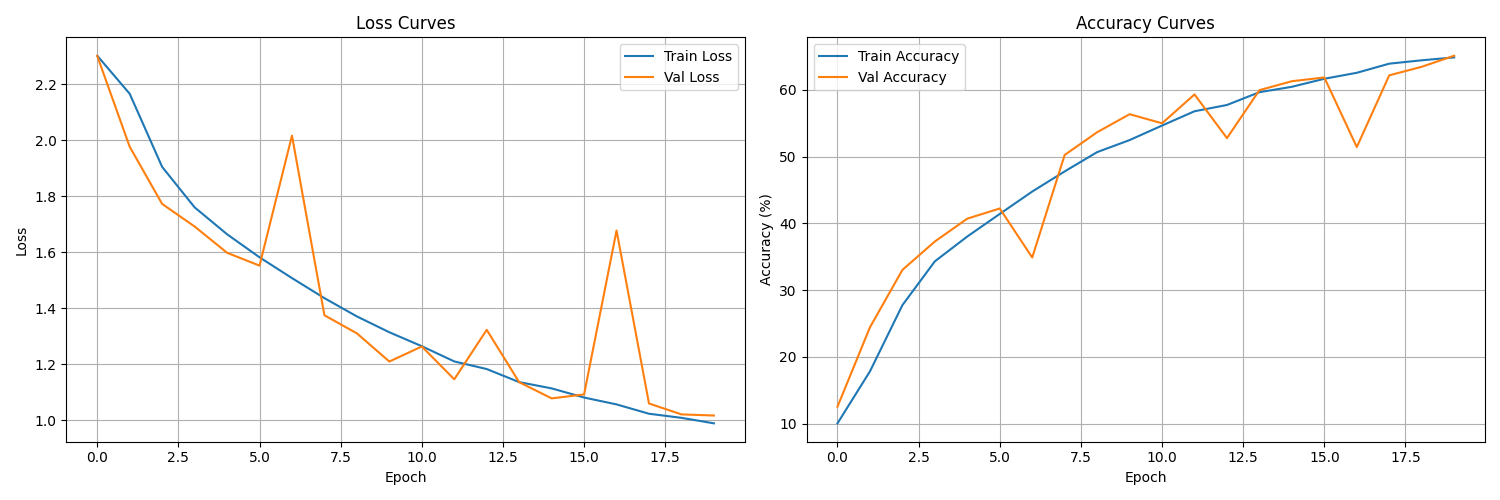

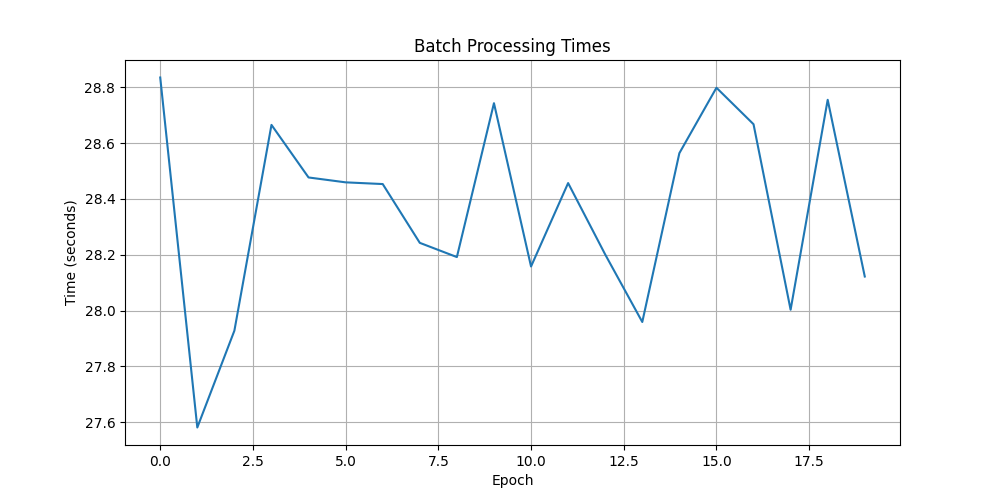

# Key Observations:

1. Total Training Time	567.2 seconds (9.45 minutes)
2. Average Epoch Time	28.36 seconds
3. Best Validation Accuracy	65.12%
4. Final Test Accuracy	77.37%

## Was Multi-GPU Efficient?
1. Speed Comparison
- Single GPU AlexNet: ~17 minutes
- Multi-GPU AlexNet: ~9.45 minutes
- Achieved ~1.8x speedup with two GPUs

2. Training Characteristics
- Consistent epoch times (28-29 seconds)
- Stable batch processing
- Good GPU utilization with parallel processing
- Effective synchronization between GPUs

3. Performance Trade-offs
- Lower accuracy compared to single-GPU version (77.37% vs 84.56%)
- More complex implementation
- Additional overhead from cross-GPU communication
- Memory split between GPUs requires careful batch management

The multi-GPU implementation successfully reduced training time by almost half, demonstrating good scaling. However, the complexity of the implementation and the communication overhead between GPUs may have impacted the final model accuracy. The trade-off between speed and accuracy should be considered when deciding whether to use this approach.

# Thank You 🤗

- Here's the Github Repository Link: https://github.com/aryashah2k/RTML/tree/main/A1

- Model Checkpoints and Weights can be downloaded from the Terabox Drive here: https://1024terabox.com/s/1m0pW0GHvsc80-MEoMAlzbA